> # Diabetes 130-US hospitals for years 1999-2008 - Patient Readmission within 30 days study.
---

## Imports

In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)


In [112]:
#from google.colab import files
#uploaded = files.upload()

In [113]:
data = pd.read_csv("Files/diabetic_data.csv")

## Data Exploration

In [114]:
data.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [115]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [116]:
data.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


The dataset represents ten years (1999-2008) of clinical care at 130 US hospitals and integrated delivery networks. Each row concerns hospital records of patients diagnosed with diabetes, who underwent laboratory, medications, and stayed up to 14 days. The goal is to **determine the early readmission of the patient within 30 days of discharge.**<br><br>
The problem is important to consider: Despite high-quality evidence showing improved clinical outcomes for diabetic patients who receive various preventive and therapeutic interventions, many patients do not receive them.

The dataset contains 101,763 entries and 47 columns.<br>
It includes both numerical and categorical data types.<br>
Let's analyse individual columns:
- **Demographic Information:** Columns like `race`, `gender`, and `age` provide demographic details of the patients.
- **Hospital Admission Information:** This includes `admission_type_id`, `discharge_disposition_id`, and `admission_source_id`.
- **Hospital Stay Details:** `time_in_hospital`, `num_lab_procedures`, `num_procedures`, `num_medications`, and details about outpatient, emergency, and inpatient visits.
- **Diagnosis Codes:** `diag_1`, `diag_2`, `diag_3` represent the primary, secondary, and additional diagnoses.
- **Diabetes Medication Information:** Columns from `metformin` to `metformin-pioglitazone` provide details on various diabetes medications.
- **Treatment Change and Diabetes Medication:** The `change` and `diabetesMed` columns indicate changes in diabetic treatment and whether diabetes medications were prescribed.
- **Readmission Information:** The `readmitted` column indicates if a patient was readmitted.

Brief data analysis:
- The numerical features vary widely in their ranges and distributions.
- Several columns have missing values represented by '?'. This is particularly noticeable in the weight column and some diagnosis columns (`diag_1`, `diag_2`, `diag_3`).
- The dataset contains a large number of categorical features. Unique values in these categories vary, with some having a wide range of values (like diagnosis codes) and others having limited options (like `change`, `diabetesMed`).
- The `readmitted` variable, our target, shows that around 53.91% of patients were not readmitted, 34.93% were readmitted after 30 days, and **11.16% were readmitted within 30 days**.
  >This shows that the distribution of the different values of the target variable are very **unbalanced**, which we highly must not neglect for our prediction model.

#### Let's plot variables distributions

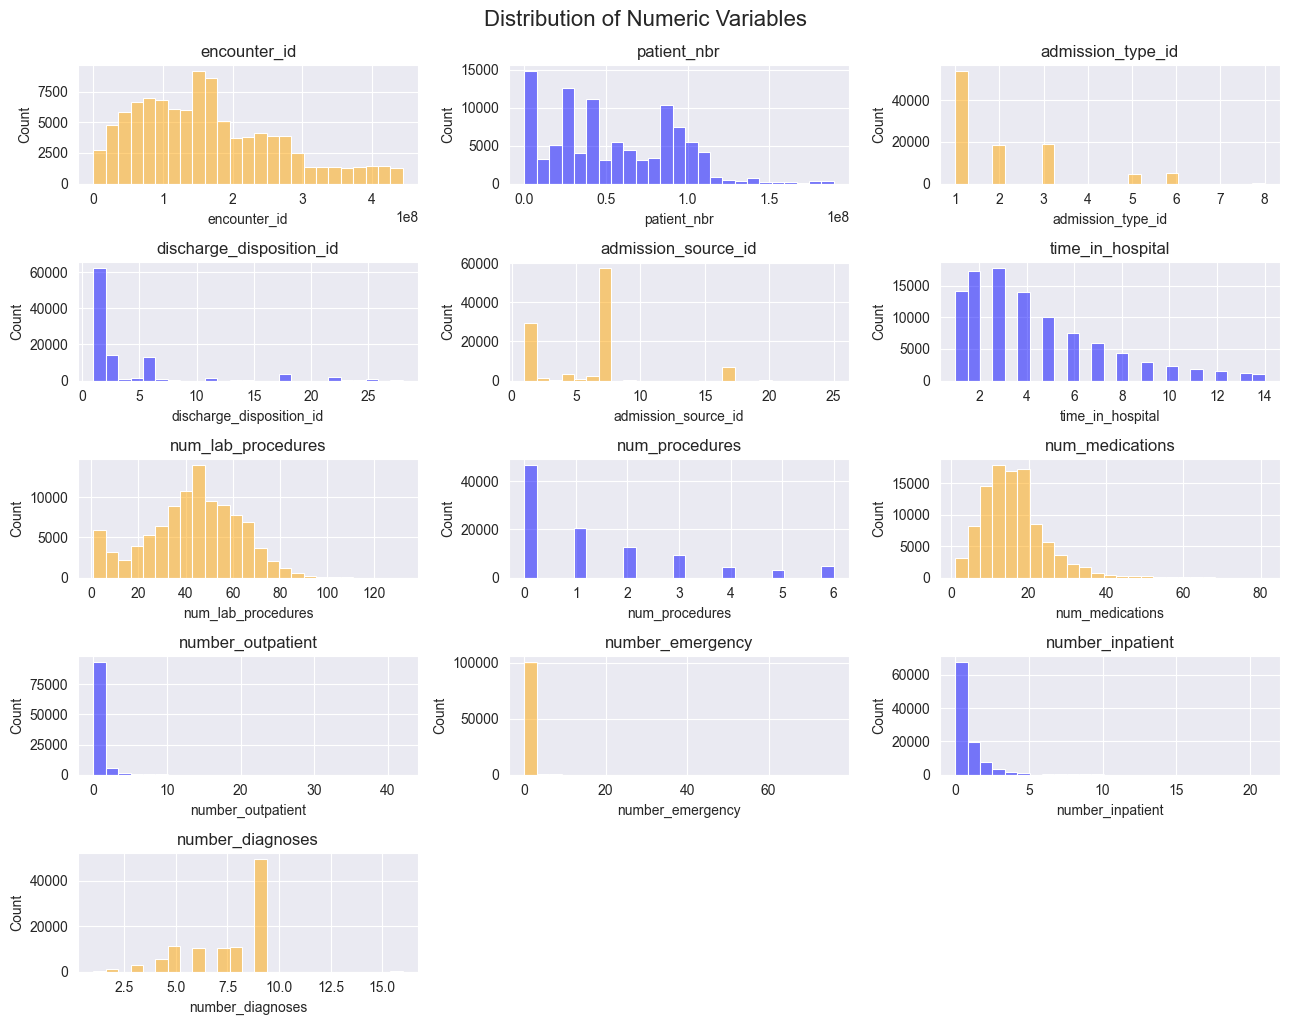

In [117]:
numeric_columns = data.select_dtypes(include=['number']).columns

plt.figure(figsize=(13, 10))
colors = ['orange' if i % 2 == 0 else 'b' for i in range(len(numeric_columns))]
# Looping over numeric columns to create a histogram for each
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(len(numeric_columns) // 3 + 1, 3, i)
    sns.histplot(data[column], kde=False, bins=25, color=colors[i-1], alpha=0.5)
    plt.title(column)

plt.tight_layout()
plt.suptitle('Distribution of Numeric Variables', fontsize=16, y=1.02)
plt.show()

<Figure size 1300x1000 with 0 Axes>

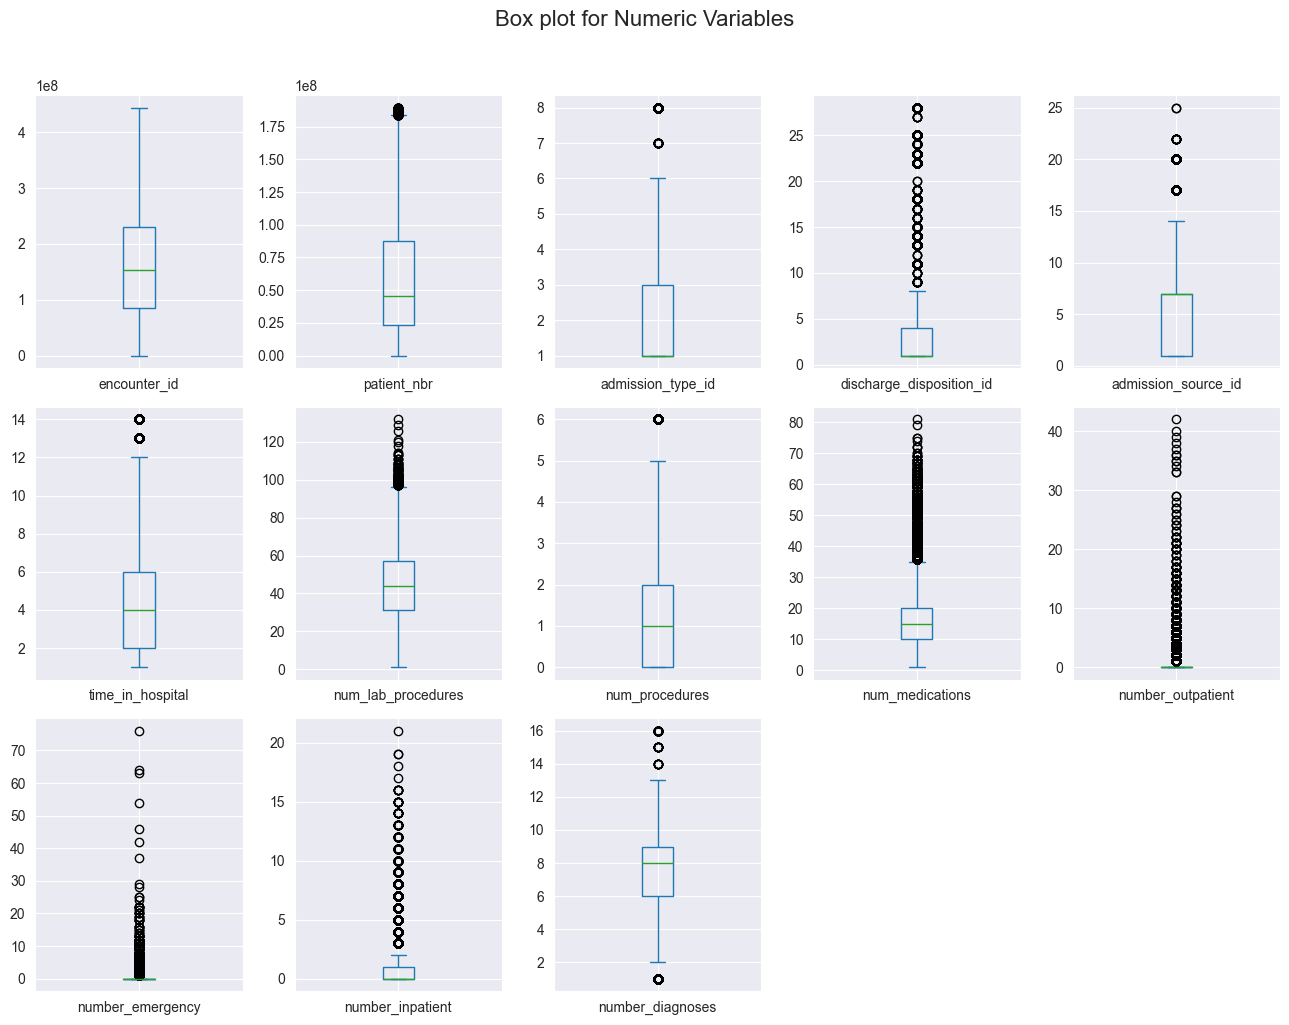

In [118]:
fig=plt.figure(figsize=(13,10))
data[numeric_columns].plot(kind='box',subplots=True, layout=(3,5), sharex=False, sharey=False, figsize=(13,10))
plt.suptitle('Box plot for Numeric Variables', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

## Data Cleaning & Data Mapping

We first need to find the columns that contain non explict Null values ('?') and set them to None

In [119]:
data.replace('?', None, inplace=True)

In [120]:
data.isnull().sum()/len(data)*100

encounter_id                 0.000000
patient_nbr                  0.000000
race                         2.233555
gender                       0.000000
age                          0.000000
weight                      96.858479
admission_type_id            0.000000
discharge_disposition_id     0.000000
admission_source_id          0.000000
time_in_hospital             0.000000
payer_code                  39.557416
medical_specialty           49.082208
num_lab_procedures           0.000000
num_procedures               0.000000
num_medications              0.000000
number_outpatient            0.000000
number_emergency             0.000000
number_inpatient             0.000000
diag_1                       0.020636
diag_2                       0.351787
diag_3                       1.398306
number_diagnoses             0.000000
max_glu_serum               94.746772
A1Cresult                   83.277322
metformin                    0.000000
repaglinide                  0.000000
nateglinide 

We drop columns that are not relevent for the prediction + the ones that have >95 missing values.
- weight
- encounter_id
- patient_nbr

In [121]:
data.drop(labels=["weight", "encounter_id", "patient_nbr"], axis=1, inplace=True)

### Data Mapping

### Target column

We encode "readmitted", as we want to predict if the patient will return in less than 30 days, we encode 0:No,>30 and 1:<30

In [122]:
data['readmitted'] = data['readmitted'].map({'NO': 0, '>30': 0, '<30':1})

### Ages

In [123]:
age_dict = {
    "[0-10)":5,
    "[10-20)":15,
    "[20-30)":25,
    "[30-40)":35,
    "[40-50)":45,
    "[50-60)":55,
    "[60-70)":65,
    "[70-80)":75,
    "[80-90)":85,
    "[90-100)":95
}

data['age'] = data['age'].apply(lambda x: age_dict[x])
data['age'].unique()

array([ 5, 15, 25, 35, 45, 55, 65, 75, 85, 95], dtype=int64)

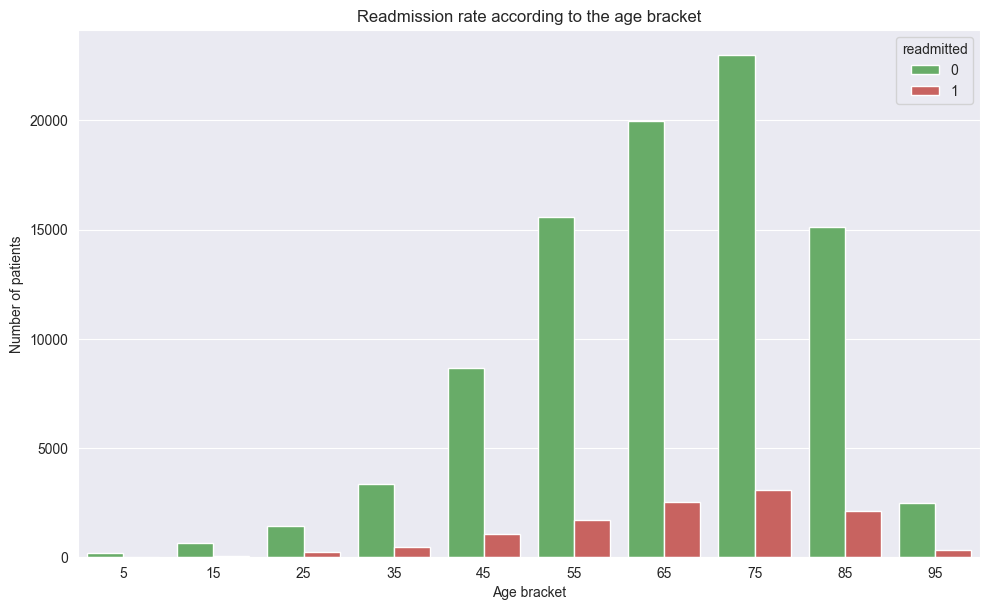

In [124]:
sns.set_style("darkgrid")
palette = {1: '#d9534f', 0: '#5cb85c'}

fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(data, x='age', hue='readmitted', ax=ax, palette=palette)
plt.tight_layout()
ax.set_title('Readmission rate according to the age bracket')
ax.set_xlabel('Age bracket')
ax.set_ylabel('Number of patients')
plt.show()

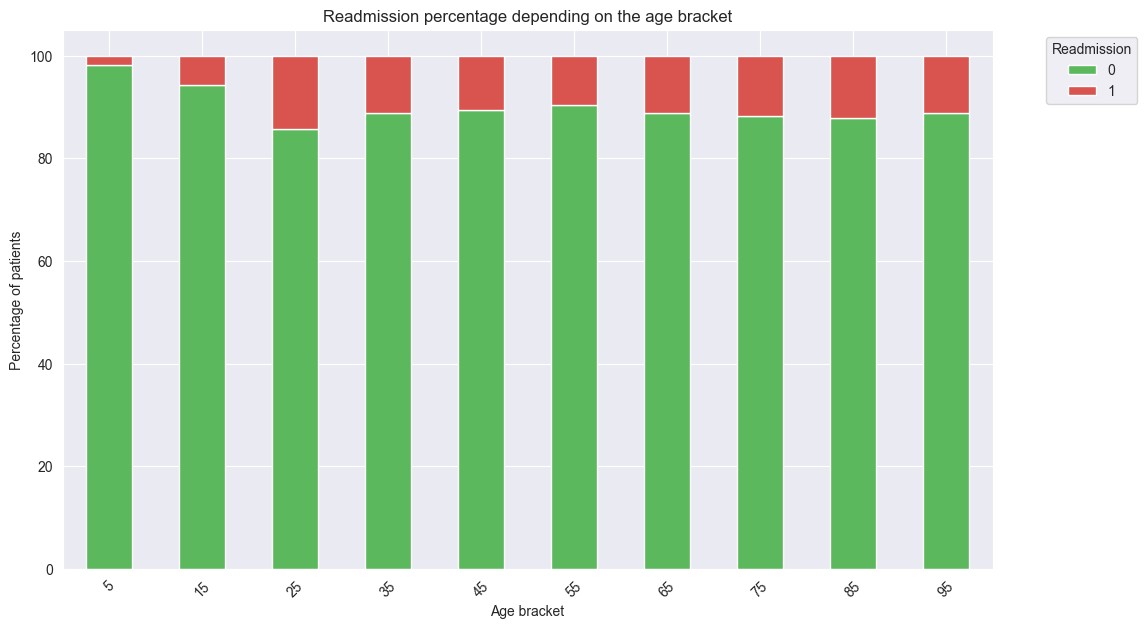

In [125]:
age_readmitted = pd.crosstab(data['age'], data['readmitted'])

# Normalization of the data
age_readmitted_percent = age_readmitted.div(age_readmitted.sum(axis=1), axis=0) * 100

age_readmitted_percent.plot(kind='bar', stacked=True, figsize=(12, 7), color=palette)
plt.xlabel('Age bracket')
plt.ylabel('Percentage of patients')
plt.title('Readmission percentage depending on the age bracket')
plt.xticks(rotation=45)
plt.legend(title='Readmission', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


### Gender

In [126]:
data = data[data['gender'].isin(['Male', 'Female'])] # We remove lines where the gender is not referenced

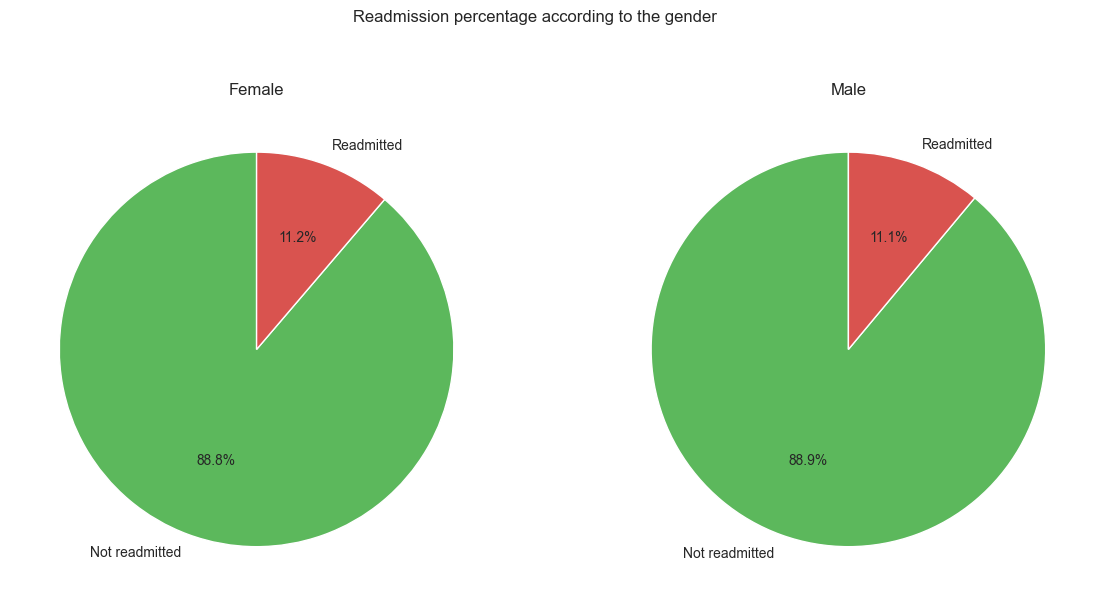

In [127]:
gender_readmitted = pd.crosstab(data['gender'], data['readmitted'])

# Normalization of the data to get the percentage of readmission
gender_readmitted_percent = gender_readmitted.div(gender_readmitted.sum(axis=1), axis=0) * 100

labels=["Not readmitted", "Readmitted"]

fig, axes = plt.subplots(1, 2, figsize=(14, 7))

axes[0].pie(gender_readmitted_percent.iloc[0], labels=labels, autopct='%1.1f%%', startangle=90, colors=[palette[0], palette[1]])
axes[0].set_title("Female")
axes[1].pie(gender_readmitted_percent.iloc[1], labels=labels, autopct='%1.1f%%', startangle=90, colors=[palette[0], palette[1]])
axes[1].set_title("Male")
plt.suptitle('Readmission percentage according to the gender')
plt.show()

We observe that the gender does not seem to have an influence on the readmission rate. We will make other statistical tests to determine if we should remove the associated columns (cf Chi-squared test). For the moment, we can encode this column to have numerical values:

In [128]:
data['gender'] = data['gender'].map({'Male': 0, 'Female': 1})

### Race

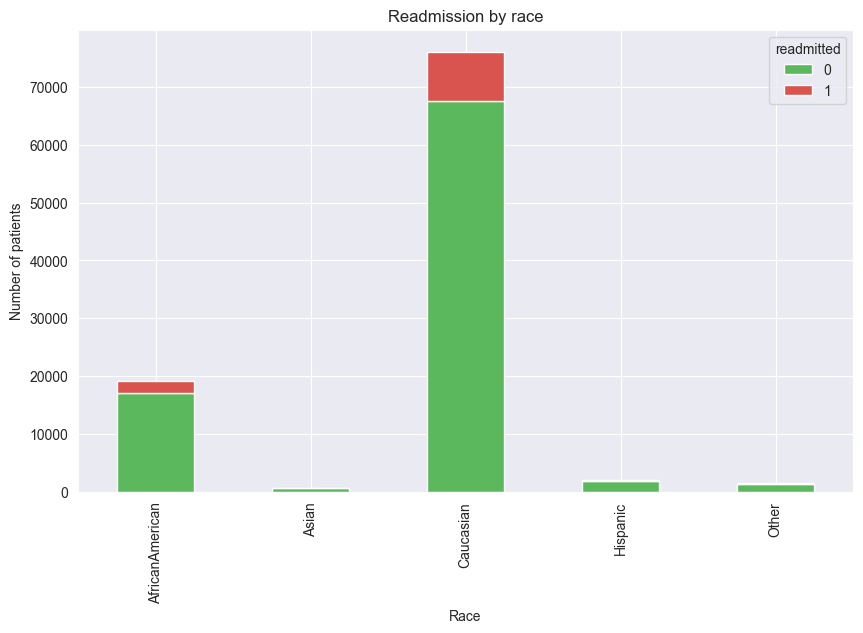

In [129]:
race_readmitted = pd.crosstab(data['race'], data['readmitted'])

race_readmitted.plot(kind='bar', stacked=True, figsize=(10, 6), color=palette)
plt.xlabel('Race')
plt.ylabel('Number of patients')
plt.title('Readmission by race')
plt.show()


### Lab procedures and number of medications taken

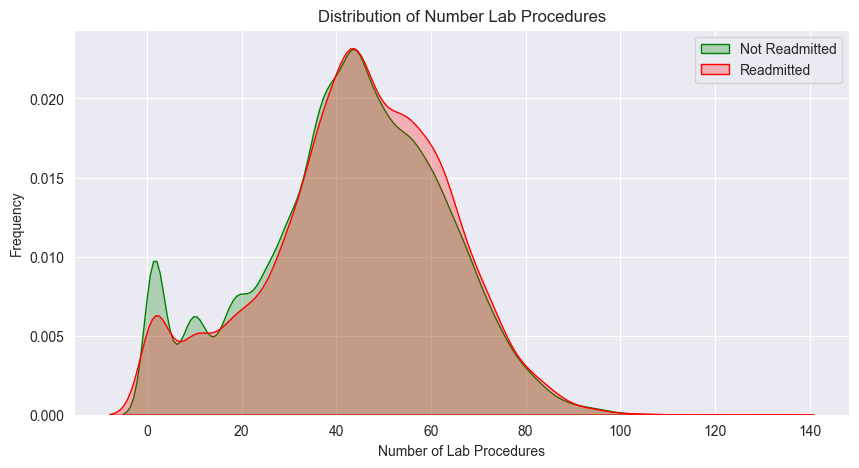

In [130]:
fig = plt.figure(figsize = (10, 5))
a = sns.kdeplot(data.loc[(data['readmitted'] == 0), "num_lab_procedures"] ,
                 color = "g", fill = True, label = "Not Readmitted")

a = sns.kdeplot(data.loc[(data['readmitted'] == 1), "num_lab_procedures"] ,
                 color = "r", fill = True, label = "Readmitted")

a.legend()
a.set_xlabel("Number of Lab Procedures")
a.set_ylabel("Frequency")
a.set_title("Distribution of Number Lab Procedures")

plt.show()

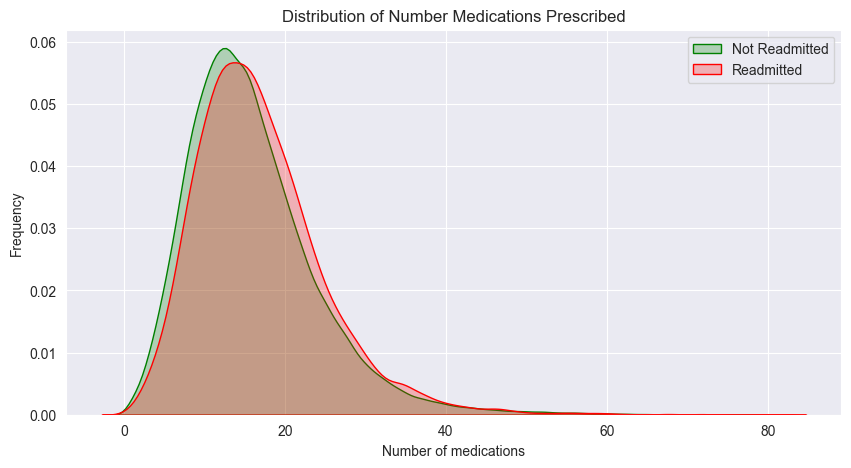

In [131]:
fig = plt.figure(figsize = (10, 5))
a = sns.kdeplot(data.loc[(data['readmitted'] == 0), "num_medications"] ,
                 color = "g", fill = True, label = "Not Readmitted")

a = sns.kdeplot(data.loc[(data['readmitted'] == 1), "num_medications"] ,
                 color = "r", fill = True, label = "Readmitted")

a.legend()
a.set_xlabel("Number of medications")
a.set_ylabel("Frequency")
a.set_title("Distribution of Number Medications Prescribed")

plt.show()

We observe that the number of medications taken does not seem to decrease the likelihood of being readmitted within the next month. While this may initially seem counterintuitive, it's understandable, considering that patients with more severe conditions are likely to require more medications and simultaneously have a higher risk of readmission.

### Medications

We encode the binary columns in order to have numerical values:

In [132]:
data['diabetesMed'] = data['diabetesMed'].map({'Yes': 1, 'No': 0})
data['change'] = data['change'].map({'Ch': 1, 'No': 0})

Our dataset provides a lot of information regarding many specific medications. For each one, it tells us if the prescribed dose has been increased, decreased, stayed the same or if the medication is not prescribed. As there is an ordinal link between the values (eg *not taking a medecine* is closer from *decreasing the prescribed dose* than *increasing it*), we decided to map those values as follow :
* 30 if the dose has been increased
* 20 if the dose is not changed
* 10 if the dose has been decreased
* 0 if the given medication has not been prescribed

In [133]:
for col in ["metformin", "repaglinide", "nateglinide", "chlorpropamide", "glimepiride", "acetohexamide", "glipizide", "glyburide", "tolbutamide", "pioglitazone", "rosiglitazone", "acarbose", "miglitol", "troglitazone", "tolazamide", "examide", "citoglipton", "insulin", "glyburide-metformin", "glipizide-metformin", "glimepiride-pioglitazone", "metformin-rosiglitazone", "metformin-pioglitazone"]:
    data[col] = data[col].apply(lambda x : 30 if x == 'Up'
                                              else ( 10 if x == 'Down'
                                              else ( 20 if x == 'Steady'
                                              else  0)))

### Diagnosis

We first fill the missing values of the diagnosis columns (`diag_1`, `diag_2` and `diag_3`) with the most common one for each column.

In [134]:
from collections import Counter
diag_1 = Counter(list(data['diag_1'])).most_common(1)[0][0]
diag_2 = Counter(list(data['diag_2'])).most_common(1)[0][0]
diag_3 = Counter(list(data['diag_3'])).most_common(1)[0][0]
data['diag_1'] = data['diag_1'].apply(lambda x : diag_1 if x == None else x)
data['diag_2'] = data['diag_2'].apply(lambda x : diag_2 if x == None else x)
data['diag_3'] = data['diag_3'].apply(lambda x : diag_3 if x == None else x)

As there is no ordinal link between the values of the diagnosis we need to find a relevant way to encode our data. One Hot Encoding enables us to solve this issue but as we have more than 800 possible values it will bring with it another major problem : to increase the dimensionality. To avoid this as much as possible, we need to group the values into broader categories, while

We then group those values into broader categories in order to apply One Hot Encoding without having too many columns.

In [135]:
def map_icd9_to_category(code):

    if code.startswith('250'):
        return 'Diabetes'
    elif code[0].isdigit():
        numeric_code = int(code.split('.')[0])
        if 1 <= numeric_code <= 139:
            return 'Infectious Diseases'
        elif 140 <= numeric_code <= 239:
            return 'Cancers and Neoplasms'
        elif 390 <= numeric_code <= 459:
            return 'Cardiovascular Diseases'
        elif (240 <= numeric_code <= 279) or \
             (280 <= numeric_code <= 289) or \
             (460 <= numeric_code <= 519):
            return 'Other Chronic Diseases'
        elif (290 <= numeric_code <= 319) or \
             (320 <= numeric_code <= 389):
            return 'Mental and Neurological Disorders'
        elif (520 <= numeric_code <= 579) or \
             (580 <= numeric_code <= 629) or \
             (680 <= numeric_code <= 709):
            return 'Digestive, Genitourinary, and Skin Disorders'
        elif (710 <= numeric_code <= 739) or \
             (740 <= numeric_code <= 759) or \
             (760 <= numeric_code <= 779):
            return 'Musculoskeletal, Connective Tissue, and Congenital Disorders'
        elif (780 <= numeric_code <= 799) or \
             (800 <= numeric_code <= 999):
            return 'General Symptoms, Injuries, and Other Conditions'
        else:
            return 'Uncategorized'
    elif code.startswith('V') or code.startswith('E'):
        return 'General Symptoms, Injuries, and Other Conditions'
    else:
        return 'Uncategorized'

In [136]:
data["diag_1"] = data["diag_1"].apply(lambda x:map_icd9_to_category(x))
data["diag_2"] = data["diag_2"].apply(lambda x:map_icd9_to_category(x))
data["diag_3"] = data["diag_3"].apply(lambda x:map_icd9_to_category(x))
data = pd.get_dummies(data, columns=["diag_1", "diag_2", "diag_3"], prefix=["diag_1", "diag_2", "diag_3"])

### Payer code

The original categories of the payer code column are :

* MC: Medicare.
* MD: Medicaid.
* HM: Health Maintenance Organization (HMO).
* UN: UnitedHealthcare.
* BC: BlueCross BlueShield.
* SP: Self-Pay.
* CP: Capitation Plan.
* SI: Self-Insured.
* DM: Disease Management Program.
* CM: Commercial Insurance Company.
* CH: Children's Health Insurance Program (CHIP).
* PO: Point of Service (POS).
* WC: Workers' Compensation.
* OT: Other.
* OG: Government.
* MP: Medicare Plus Blue.
* FR: Free.



Similarly to the work we did with the diagnosis, we group those categories into broader ones, to enable us to apply One Hot Encoding without having too many columns. We will divide them into the following categories :
* Government Programs
* Private Insurance
* Managed Care and Networks
* Self-Pay and Other Plans
* Specialized Programs
* Other

In [137]:
payer_code_mapping = {
    'MC': 'Government Programs',
    'MD': 'Government Programs',
    'CH': 'Government Programs',
    'OG': 'Government Programs',
    'UN': 'Private Insurance',
    'BC': 'Private Insurance',
    'CM': 'Private Insurance',
    'MP': 'Private Insurance',
    'HM': 'Managed Care and Networks',
    'PO': 'Managed Care and Networks',
    'SP': 'Self-Pay and Other Plans',
    'CP': 'Self-Pay and Other Plans',
    'SI': 'Self-Pay and Other Plans',
    'WC': 'Self-Pay and Other Plans',
    'FR': 'Self-Pay and Other Plans',
    'DM': 'Specialized Programs',
    'OT': 'Other'
}

In [138]:
data['payer_code'] = data['payer_code'].map(payer_code_mapping)
data['payer_code'].fillna('Other', inplace=True)
data = pd.get_dummies(data, columns=["payer_code"], prefix=["payer_code"])

### Medical Speciality

We follow the same logic and group the specialities into broader categories, while trying to keep a relevant classification for our specific case. We decided to use the following categories :
* General Practice and Internal Medecine
* Surgery and Surgical Specialties
* Pediatrics and Pediatric Subspecialties
* Women's Health and Obstetrics/Gynecology
* Specialized Organ and System Experts
* Diagnostic and Therapeutic Services
* Emergency Medicine and Critical Care
* Other Specialties

In [139]:
categories = {
    'General Practice and Internal Medicine': ['InternalMedicine', 'Family/GeneralPractice', 'Hospitalist', 'PhysicianNotFound', 'Resident', 'DCPTEAM', 'OutreachServices'],
    'Surgery and Surgical Specialties': ['Surgery-General', 'Orthopedics', 'Surgery-Cardiovascular/Thoracic', 'Surgery-Neuro', 'Surgery-Colon&Rectal', 'Surgery-Plastic', 'Surgery-Thoracic', 'Surgery-PlasticwithinHeadandNeck', 'Surgery-Pediatric', 'Surgery-Vascular', 'Surgery-Maxillofacial', 'Surgery-Cardiovascular', 'SurgicalSpecialty'],
    'Pediatrics and Pediatric Subspecialties': ['Pediatrics-Endocrinology', 'Pediatrics', 'Pediatrics-CriticalCare', 'Pediatrics-Pulmonology', 'Pediatrics-Hematology-Oncology', 'Pediatrics-Neurology', 'Pediatrics-EmergencyMedicine', 'Pediatrics-InfectiousDiseases', 'Pediatrics-AllergyandImmunology', 'Cardiology-Pediatric'],
    'Women\'s Health and Obstetrics/Gynecology': ['Obsterics&Gynecology-GynecologicOnco', 'ObstetricsandGynecology', 'Gynecology', 'Obstetrics'],
    'Specialized Organ and System Experts': ['Cardiology', 'Gastroenterology', 'Nephrology', 'Psychiatry', 'Pulmonology', 'Hematology/Oncology', 'Endocrinology', 'Urology', 'Neurology', 'Rheumatology', 'AllergyandImmunology', 'InfectiousDiseases', 'Dermatology', 'Neurophysiology', 'Endocrinology-Metabolism'],
    'Diagnostic and Therapeutic Services': ['Radiology', 'Psychology', 'Anesthesiology', 'Podiatry', 'Ophthalmology', 'Pathology', 'Speech', 'PhysicalMedicineandRehabilitation'],
    'Emergency Medicine and Critical Care': ['Emergency/Trauma', 'Anesthesiology-Pediatric', 'IntensiveCare', 'SportsMedicine', 'Perinatology'],
    'Other Specialties and Miscellaneous': ['Otolaryngology', 'Psychiatry-Child/Adolescent', 'Psychiatry-Addictive', 'Dentistry', 'Surgeon', 'Osteopath', 'Hematology', 'Proctology', 'Radiologist']
}

In [140]:
specialty_to_category = {specialty: category for category, specialties in categories.items() for specialty in specialties}

data['medical_specialty'] = data['medical_specialty'].map(specialty_to_category)
data['medical_specialty'].fillna('Other', inplace=True)

data = pd.get_dummies(data, columns=["medical_specialty"], prefix=["medical_specialty"])

### Admission type

Regarding the admission type, we decided to use Ordinal Encoding, and to order the categories from the most severe to the least one as described below :

In [141]:
admission_dict = {
    1:"Urgent",
    2:"Urgent",
    3:"Elective",
    4:"Newborn",
    5:"Other",
    6:"Other",
    7:"Other",
    8:"Other"
}

In [142]:
data["admission_type_id"] = data["admission_type_id"].apply(lambda x:admission_dict[x])
data = pd.get_dummies(data, columns=["admission_type_id"], prefix=["admission_type_id"])

### Admission source

We group the admission types by categories ranked by severity from 1 to 5 (1 being the least severe) as follows:

Category 1: Least Severe

    9: Not Available
    11: Normal Delivery
    15: Not Available
    17: NULL
    20: Not Mapped
    21: Unknown/Invalid
    23: Born inside this hospital

Category 2: Less Severe

    1: Physician Referral
    2: Clinic Referral
    3: HMO Referral
    18: Transfer From Another Home Health Agency
    19: Readmission to Same Home Health Agency
    25: Transfer from Ambulatory Surgery Center

Category 3: Moderate Severity

    4: Transfer from a hospital
    5: Transfer from a Skilled Nursing Facility (SNF)
    6: Transfer from another health care facility
    10: Transfer from critical access hospital
    14: Extramural Birth
    22: Transfer from hospital inpt/same fac result in a sep claim
    24: Born outside this hospital

Category 4: More Severe

    7: Emergency Room
    8: Court/Law Enforcement
    12: Premature Delivery
    13: Sick Baby
    26: Transfer from Hospice

Category 5: Most Severe

    Nothing, as the most severe admission sources are all less severe than the most severe discharged disposition.




In [143]:
admission_source_dict = {
    1: 2, 2: 2, 3: 2, 4: 3, 5: 3, 6: 3, 7: 4, 8: 4, 9: 1, 10: 3,
    11: 1, 12: 4, 13: 4, 14: 3, 15: 1, 17: 1, 18: 2, 19: 2, 20: 1,
    21: 1, 22: 3, 23: 1, 24: 3, 25: 2, 26: 4
}

data["admission_source_id"] = data["admission_source_id"].apply(lambda x:admission_source_dict[x])

### Discharge disposition

Similarly, we group the discharged types by categories ranked by severity (1 being the least severe) as follows:

Category 1: Least Severe

    1: Discharged to home
    18: NULL
    25: Not Mapped
    26: Unknown/Invalid

Category 2: Less Severe

    3: Discharged/transferred to SNF
    4: Discharged/transferred to ICF
    6: Discharged/transferred to home with home health service
    8: Discharged/transferred to home under care of Home IV provider
    12: Still patient or expected to return for outpatient services
    15: Discharged/transferred within this institution to Medicare approved swing bed
    16: Discharged/transferred/referred another institution for outpatient services
    17: Discharged/transferred/referred to this institution for outpatient services
    22: Discharged/transferred to another rehab facility including rehab units of a hospital
    23: Discharged/transferred to a long term care hospital
    24: Discharged/transferred to a nursing facility certified under Medicaid but not certified under Medicare
    27: Discharged/transferred to a federal health care facility

Category 3: Moderate Severity

    2: Discharged/transferred to another short term hospital
    5: Discharged/transferred to another type of inpatient care institution
    9: Admitted as an inpatient to this hospital
    10: Neonate discharged to another hospital for neonatal aftercare
    28: Discharged/transferred/referred to a psychiatric hospital or psychiatric distinct part unit of a hospital
    29: Discharged/transferred to a Critical Access Hospital (CAH)
    30: Discharged/transferred to another Type of Health Care Institution not Defined Elsewhere

Category 4: More Severe

    7: Left AMA
    13: Hospice / home
    14: Hospice / medical facility

Category 5: Most Severe

    11: Expired
    19: Expired at home. Medicaid only, hospice
    20: Expired in a medical facility. Medicaid only, hospice
    21: Expired, place unknown. Medicaid only, hospice

In [144]:
discharged_dict = {
    1: 1, 2: 3, 3: 2, 4: 2, 5: 3, 6: 2, 7: 4, 8: 2, 9: 3, 10: 3,
    11: 5, 12: 2, 13: 4, 14: 4, 15: 2, 16: 2, 17: 2, 18: 1, 19: 5,
    20: 5, 21: 5, 22: 2, 23: 2, 24: 2, 25: 1, 26: 1, 27: 2, 28: 3,
    29: 3, 30: 3
}

data["discharge_disposition_id"] = data["discharge_disposition_id"].apply(lambda x:discharged_dict[x])

### Diabete test result

The columns `max_glu_serum` and `A1Cresult` provide information about diabete tests.

The `max_glu_serum` indicates the range of the glucose level in the patient's blood serum, or it may indicate whether the test was not taken or measured. It can take the values :
* ">200": if the glucose level in the blood serum is greater than 200
* ">300": if the glucose level in the blood serum is greater than 300
* "normal": if the glucose level in the blood serum falls within the normal range.
* "none": if the test for glucose level in the blood serum was not measured or not taken

The `A1Cresult` indicates the range of the A1C (HbA1c) test result, which is a measure of average blood sugar levels over the past few months. It may also indicate whether the test was not taken or measured. It can take the following values :
* ">8": the A1C test result was greater than 8%, suggesting uncontrolled blood sugar levels.
* ">7": the A1C test result was greater than 7% but less than 8%, indicating elevated blood sugar levels.
* "normal": the A1C test result falls within the normal range, typically less than 7%.
* "none": Indicates that the A1C test was not measured or not taken.

As the "none" value cannot be considered closer from a possible value than from another, it wouldn't be rigorous to use Ordinal Encoding. Given the low number of columns, we decided to use One Hot Encoding:


In [145]:
colonnes_categ = ['A1Cresult', 'max_glu_serum']
data = pd.get_dummies(data, columns=colonnes_categ)

### Race

We saw that there was some missing data in the `race` column. Now that we encoded our dataset, we could use the other columns to try to predict the missing values. Let's first observe how our data is distributed:

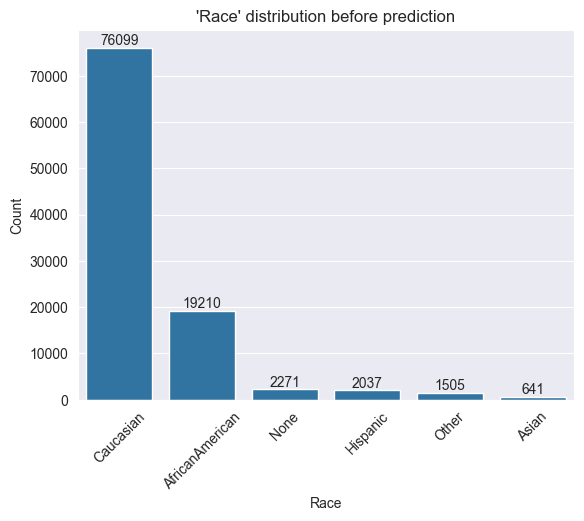

In [146]:
data_copy = data.copy()
data_copy['race'] = data_copy['race'].fillna('None')
race_counts = data_copy['race'].value_counts()

sns.barplot(x=race_counts.index, y=race_counts.values)

# add values on the top of each bar
for index, value in enumerate(race_counts.values):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.xlabel('Race')
plt.ylabel('Count')
plt.title("'Race' distribution before prediction")
plt.xticks(rotation=45)
plt.show()

There is 2271 missing data, let's predict them !

In [147]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Separating rows where 'race' is not missing
df_train = data[data['race'].notna()]
df_predict = data[data['race'].isna()]

X_train = df_train.drop('race', axis=1)
y_train = df_train['race']
X_predict = df_predict.drop('race', axis=1)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

rf = RandomForestClassifier(n_estimators=100, max_depth=25, criterion="gini", random_state=23)
rf.fit(X_train, y_train)

predicted_races = rf.predict(X_predict) # Predicting

data.loc[data['race'].isna(), 'race'] = predicted_races

d:\Programmes\Anaconda\envs\PythonForDataAnalysis\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


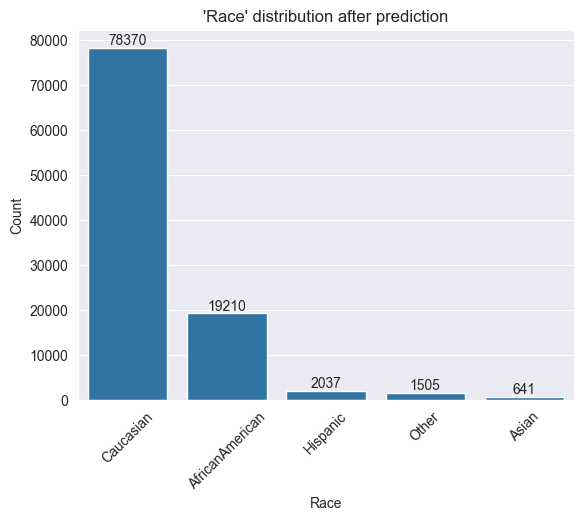

In [148]:
race_counts = data['race'].value_counts(dropna=False)

sns.barplot(x=race_counts.index, y=race_counts.values)

for index, value in enumerate(race_counts.values):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.xlabel('Race')
plt.ylabel('Count')
plt.title("'Race' distribution after prediction")
plt.xticks(rotation=45)
plt.show()

In [149]:
data.columns

Index(['race', 'gender', 'age', 'discharge_disposition_id',
       'admission_source_id', 'time_in_hospital', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'number_diagnoses', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'diag_1_Cancers and Neoplasms', 'diag_1_Cardiovascular Diseases',
       'diag_1_Diabetes',
       'diag_1_Digestive, Genitourinary, and Skin Disorders',
       'diag_1_General Symptoms, Injuries, and Other Conditions',
       'diag_1_Infectious Diseases',

Perfect, we don't have any missing value for this column !

### Study of the columns' relevance

Even if we've already dropped a few columns, some of the remaining ones still may not be relevant for our case. In order to identify those columns, for each of our feature, we will measure its dependance with the target feature and we will drop the least dependant ones.

- For the categorical variables, we will do so by using the **Chi-squared test**.

- For the numerical variables, we will use **correlation matrices**.

Let's first select only the categorical variables, by dropping the numerical ones:

In [150]:
colonnes_numeriques = [
    'age', 'time_in_hospital', 'num_lab_procedures',
    'num_procedures', 'num_medications', 'number_outpatient',
    'number_emergency', 'number_inpatient', 'number_diagnoses'
]

data_cat = data.drop(colonnes_numeriques, axis=1)

In [151]:
from scipy.stats import chi2_contingency

columns_is_significant = []
results_significance = []

def chi_square_test_with_target(df, target_column, alpha=0.05):
    columns = [col for col in df.columns if col != target_column]


    for col in columns:
        contingency_table = pd.crosstab(df[col], df[target_column])
        chi2, p, dof, _ = chi2_contingency(contingency_table)

        # Afficher les résultats
        print(f"Test du chi-carré entre {col} et {target_column}:")
        print(f"Chi2 Statistique: {chi2}, P-value: {p}, Degrés de liberté: {dof}")
        results_significance.append((col,p))

        # Interprétation de la p-value
        if p < alpha:
            print(f"Les variables {col} et {target_column} sont statistiquement dépendantes (p < {alpha})\n")
            columns_is_significant.append(col)
        else:
            print(f"Les variables {col} et {target_column} sont statistiquement indépendantes (p >= {alpha})\n")

chi_square_test_with_target(data_cat, 'readmitted')

Test du chi-carré entre race et readmitted:
Chi2 Statistique: 5.581242655776764, P-value: 0.23267994798808408, Degrés de liberté: 4
Les variables race et readmitted sont statistiquement indépendantes (p >= 0.05)

Test du chi-carré entre gender et readmitted:
Chi2 Statistique: 0.8419460932978957, P-value: 0.35884077972245254, Degrés de liberté: 1
Les variables gender et readmitted sont statistiquement indépendantes (p >= 0.05)

Test du chi-carré entre discharge_disposition_id et readmitted:
Chi2 Statistique: 951.5289193251347, P-value: 1.138739423681438e-204, Degrés de liberté: 4
Les variables discharge_disposition_id et readmitted sont statistiquement dépendantes (p < 0.05)

Test du chi-carré entre admission_source_id et readmitted:
Chi2 Statistique: 40.10735131542958, P-value: 1.0111160395779867e-08, Degrés de liberté: 3
Les variables admission_source_id et readmitted sont statistiquement dépendantes (p < 0.05)

Test du chi-carré entre metformin et readmitted:
Chi2 Statistique: 58.737

Test du chi-carré entre citoglipton et readmitted:
Chi2 Statistique: 0.0, P-value: 1.0, Degrés de liberté: 0
Les variables citoglipton et readmitted sont statistiquement indépendantes (p >= 0.05)

Test du chi-carré entre insulin et readmitted:
Chi2 Statistique: 190.78190298719113, P-value: 4.137171762772658e-41, Degrés de liberté: 3
Les variables insulin et readmitted sont statistiquement dépendantes (p < 0.05)

Test du chi-carré entre glyburide-metformin et readmitted:
Chi2 Statistique: 1.189292290462749, P-value: 0.7555735918159463, Degrés de liberté: 3
Les variables glyburide-metformin et readmitted sont statistiquement indépendantes (p >= 0.05)

Test du chi-carré entre glipizide-metformin et readmitted:
Chi2 Statistique: 0.0, P-value: 1.0, Degrés de liberté: 1
Les variables glipizide-metformin et readmitted sont statistiquement indépendantes (p >= 0.05)

Test du chi-carré entre glimepiride-pioglitazone et readmitted:
Chi2 Statistique: 0.0, P-value: 1.0, Degrés de liberté: 1
Les var

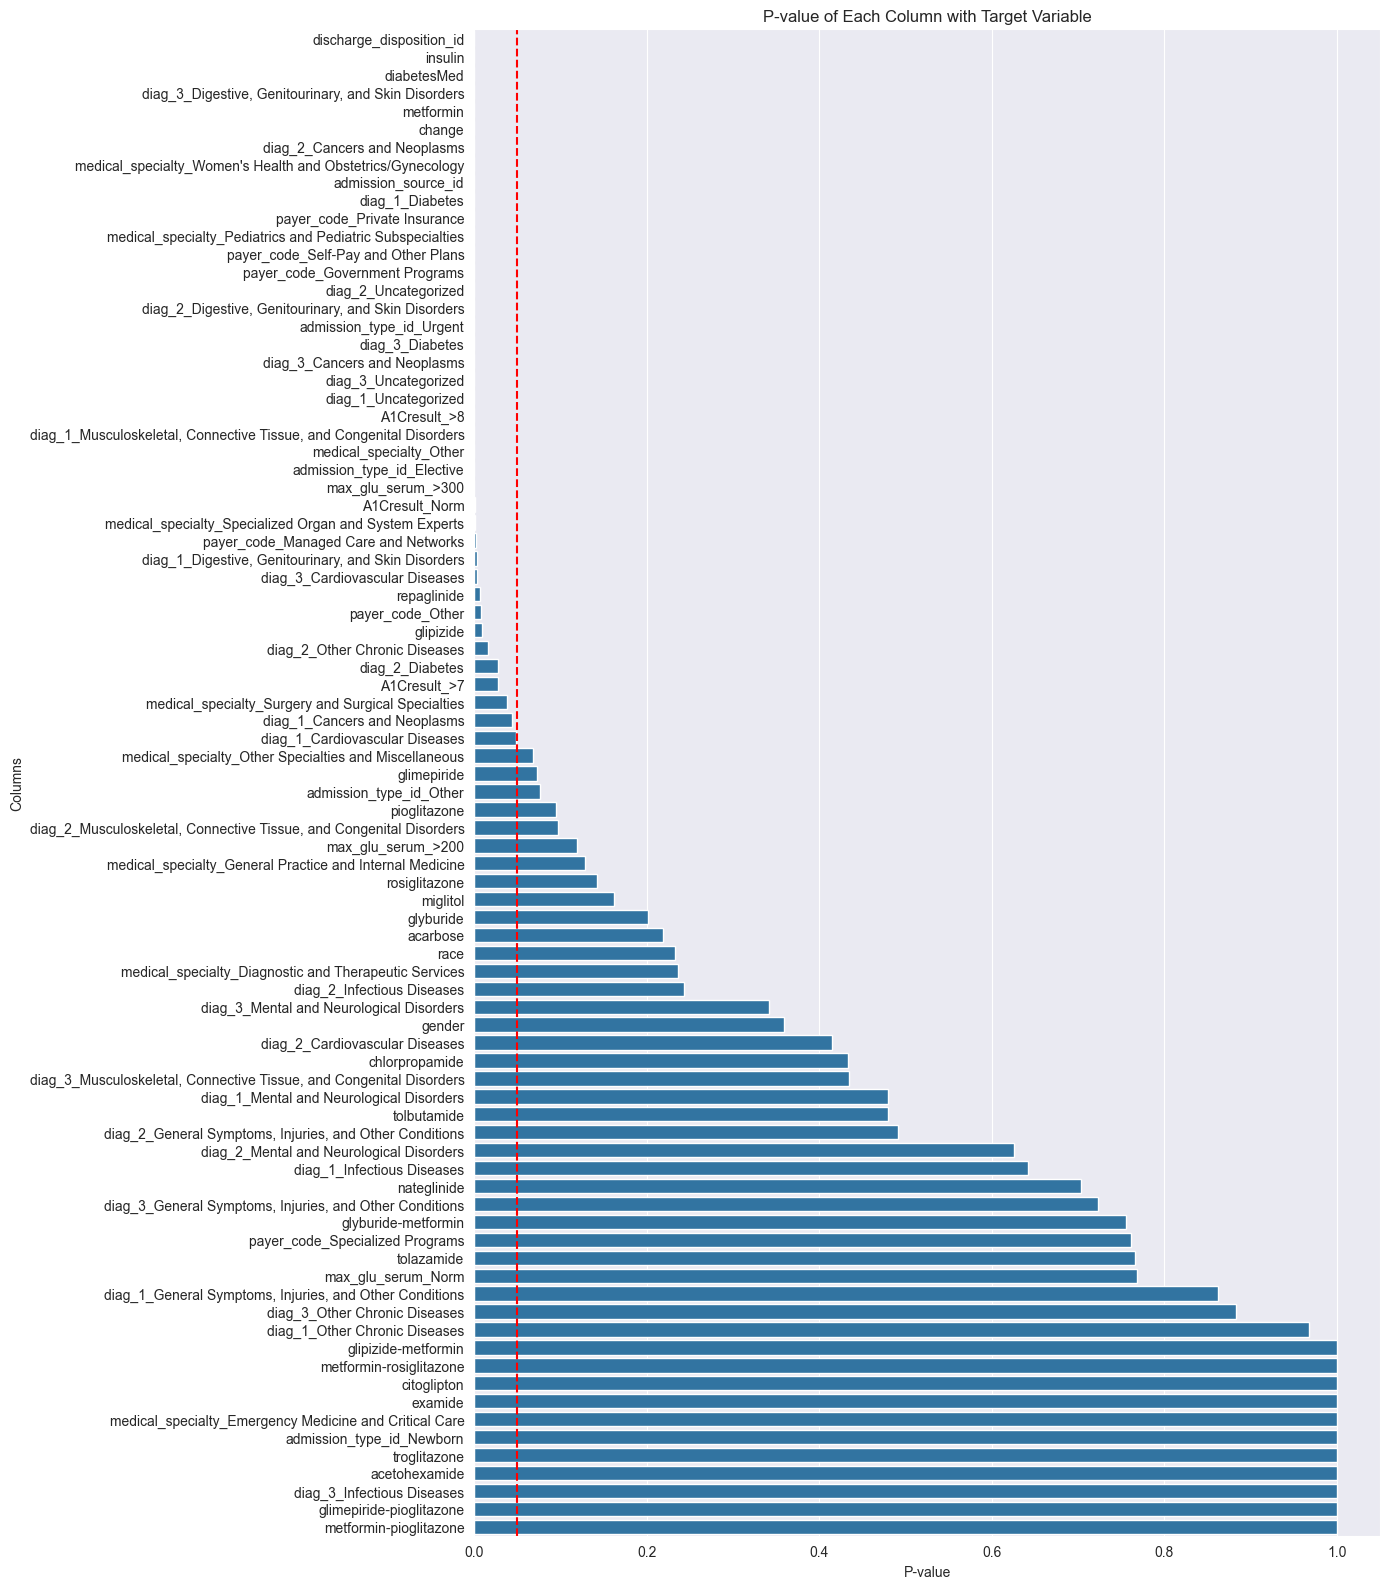

In [152]:
significant_df = pd.DataFrame(results_significance, columns=['Column', 'P-value'])

# Sort DataFrame by P-value for better visualization
significant_df = significant_df.sort_values(by='P-value')

# Create the plot
plt.figure(figsize=(14, 16))
sns.barplot(x='P-value', y='Column', data=significant_df, orient='h')
plt.axvline(x=0.05, color='red', linestyle='--')

# Enhance the plot
plt.xlabel('P-value')
plt.ylabel('Columns')
plt.title('P-value of Each Column with Target Variable')
#plt.xscale('log')  # Use logarithmic scale for better visualization of small p-values

# Show the plot
plt.tight_layout()
plt.show()

This gives us information about the dependance between a given variable and the target value `readmitted`. We only keep the relevant columns, stored into `columns_is_significant`:

In [153]:
columns_is_significant

['discharge_disposition_id',
 'admission_source_id',
 'metformin',
 'repaglinide',
 'glipizide',
 'insulin',
 'change',
 'diabetesMed',
 'diag_1_Cancers and Neoplasms',
 'diag_1_Cardiovascular Diseases',
 'diag_1_Diabetes',
 'diag_1_Digestive, Genitourinary, and Skin Disorders',
 'diag_1_Musculoskeletal, Connective Tissue, and Congenital Disorders',
 'diag_1_Uncategorized',
 'diag_2_Cancers and Neoplasms',
 'diag_2_Diabetes',
 'diag_2_Digestive, Genitourinary, and Skin Disorders',
 'diag_2_Other Chronic Diseases',
 'diag_2_Uncategorized',
 'diag_3_Cancers and Neoplasms',
 'diag_3_Cardiovascular Diseases',
 'diag_3_Diabetes',
 'diag_3_Digestive, Genitourinary, and Skin Disorders',
 'diag_3_Uncategorized',
 'payer_code_Government Programs',
 'payer_code_Managed Care and Networks',
 'payer_code_Other',
 'payer_code_Private Insurance',
 'payer_code_Self-Pay and Other Plans',
 'medical_specialty_Other',
 'medical_specialty_Pediatrics and Pediatric Subspecialties',
 'medical_specialty_Specia

Regarding the numerical variables we can measure their correlation by using correlation matrices. Let's first measure the Pearson correlation:

Text(0.5, 1.0, 'pearson correlation')

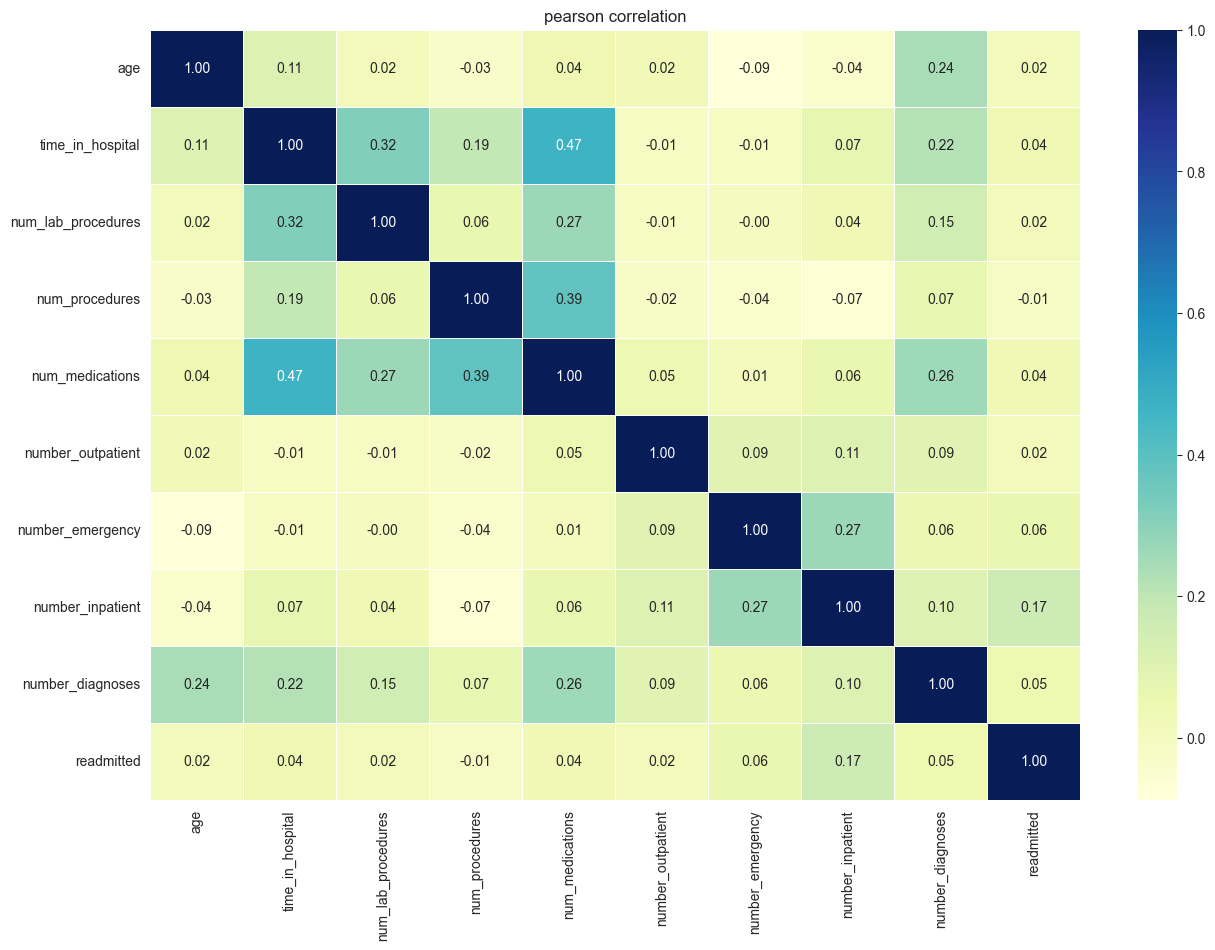

In [154]:
colonnes_numeriques.append('readmitted')
data_num = data[colonnes_numeriques]

corr_matrix = data_num.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='YlGnBu', cbar=True, linewidths=0.5)
plt.title('pearson correlation')

Text(0.5, 1.0, 'Spearman correlation')

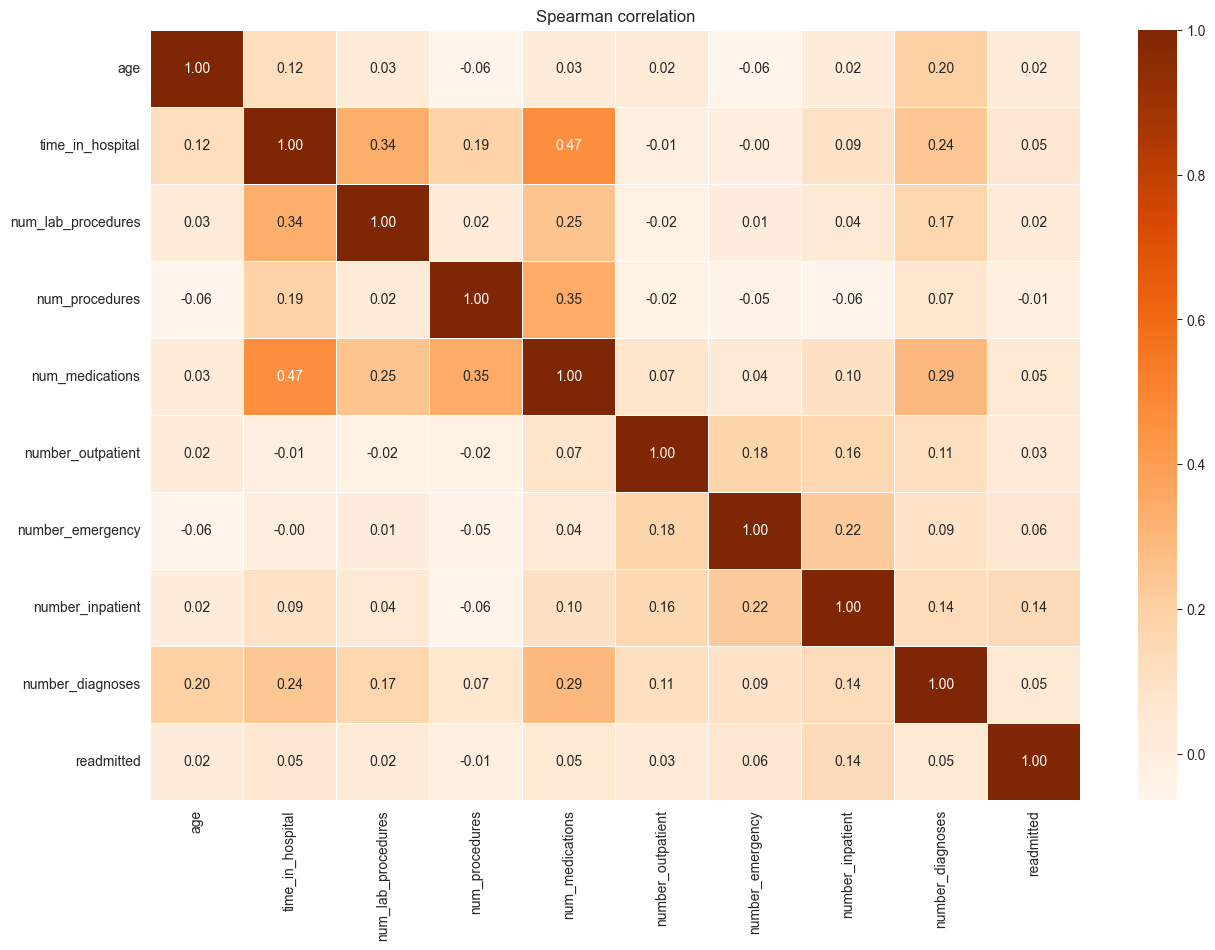

In [155]:
corr_matrix2 = data_num.corr(method='spearman')
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix2, annot=True, fmt='.2f', cmap='Oranges', cbar=True, linewidths=0.5)
plt.title('Spearman correlation')

In [156]:
colonnes_numeriques.remove('readmitted')

colonnes_to_keep = []
colonnes_to_keep+=colonnes_numeriques
colonnes_to_keep+=columns_is_significant
colonnes_to_keep.append('readmitted')

data = data[colonnes_to_keep]

In [157]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101763 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                                                               Non-Null Count   Dtype
---  ------                                                               --------------   -----
 0   age                                                                  101763 non-null  int64
 1   time_in_hospital                                                     101763 non-null  int64
 2   num_lab_procedures                                                   101763 non-null  int64
 3   num_procedures                                                       101763 non-null  int64
 4   num_medications                                                      101763 non-null  int64
 5   number_outpatient                                                    101763 non-null  int64
 6   number_emergency                                                     101763 non-null  int64
 7   number_inpatient

We now have a clean dataset ready to be used !

## Predictive Modeling

### Imports and definition of our measure functions

In [158]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, f1_score, confusion_matrix, recall_score, precision_score

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [159]:
# Matrice de confusion
def conf_matrix(y_test, y_pred):
    conf_matrix = confusion_matrix(y_test, y_pred)
    print(conf_matrix)
    return conf_matrix

# Presicion & Recall
def precision_recall(y_test, y_pred):
    precision_ = precision_score(y_test, y_pred)
    recall_ = recall_score(y_test, y_pred)
    print('precision:', precision_, 'recall:', recall_)
    return(precision_, recall_)

# F1 score
def f1(y_test, y_pred):
    f1 = f1_score(y_test, y_pred)
    print("F1 Score:", f1)
    return f1

# AUC score
def auc(y_test, y_pred_prob):
    auc_score = roc_auc_score(y_test, y_pred_prob)
    print("AUC:", auc_score)
    return auc_score

In [160]:
# !pip install imbalanced-learn

### Split and scale the data

In [161]:
X = data.drop('readmitted', axis=1)
y = data['readmitted']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

from sklearn.preprocessing import StandardScaler
import joblib

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# joblib.dump(scaler, '../models/scaler.pkl')

### Models

In selecting models for predicting readmission rates , we intentionally focused on **tree-based** models. This decision was driven by the inherent characteristics of tree-based algorithms, which are **less inclined to assume linear relationships between variables.**<br> Unlike many linear models that rely on the assumption of linear correlations among variables, tree-based models such as Random Forests, Gradient Boosting, and XGBoost make decisions based on hierarchical, conditional structures, which are more flexible and less likely to impose or infer linear relationships where they may not exist.<br><br>
We wanted models that have the ability to handle large, complex, and imbalanced datasets, this is why we chose the following models which offer parameters to rebalance the dataset.

#### Random Forest

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Defining the parameter grid for GridSearchCV
param_grid_rf = {
    'n_estimators': range(100, 250, 30),
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    "max_samples": [0.5, 0.8, 1.0]
}

# Setting up a RandomForestClassifier model
rf_model = RandomForestClassifier(class_weight="balanced", max_features='sqrt')

# Setting up GridSearchCV to find the best parameters
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=3, n_jobs=-1, verbose=10, scoring = 'f1')

# Fitting GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Best parameters found by GridSearchCV
best_params = grid_search.best_params_
best_rf = grid_search.best_estimator_

prediction_proba = best_rf.predict_proba(X_test)[:,1]
prediction = best_rf.predict(X_test)

# Visualize model performance
conf_matrix(y_test, prediction)
precision_recall(y_test, prediction)
f1(y_test, prediction)
auc(y_test, prediction_proba)


Fitting 3 folds for each of 1080 candidates, totalling 3240 fits


d:\Programmes\Anaconda\envs\PythonForDataAnalysis\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
1620 fits failed out of a total of 3240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1620 fits failed with the following error:
Traceback (most recent call last):
  File "d:\Programmes\Anaconda\envs\PythonForDataAnalysis\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\Programmes\Anaconda\envs\PythonForDataAnalysis\lib\site-packages\sklearn\ensemble\_forest.py", line 397, in fit
    raise ValueError(
ValueError: `max_sample` cannot be set if `bootstrap=False`. Either switch to `bootstrap=True` or set `max_sa

[[18485  8603]
 [ 1543  1898]]
precision: 0.18074469098181126 recall: 0.5515838419064225
F1 Score: 0.2722708363219051
AUC: 0.6683955405208001


0.6683955405208001

#### BalancedRandomForestClassifier

In [162]:
from imblearn.ensemble import BalancedRandomForestClassifier


brf_params = {"max_depth": [5, 7, 10],
             "n_estimators": range(100, 250, 30),
             "max_samples": [0.8],
             "max_features": ['sqrt']
            }

brf_model = BalancedRandomForestClassifier()

grid_search_brf = GridSearchCV(estimator=brf_model, param_grid=brf_params, cv=3, n_jobs=-1, verbose=10, scoring = 'f1')
grid_search_brf.fit(X_train, y_train)

best_params_brf = grid_search_brf.best_params_
best_brf = grid_search_brf.best_estimator_

prediction_proba_brf = best_brf.predict_proba(X_test)[:,1]
prediction_brf = best_brf.predict(X_test)

conf_matrix(y_test, prediction_brf)
precision_recall(y_test, prediction_brf)
f1(y_test, prediction_brf)
auc(y_test, prediction_proba_brf)


Fitting 3 folds for each of 15 candidates, totalling 45 fits
[[16031 11057]
 [ 1222  2219]]
precision: 0.1671437179873456 recall: 0.6448706771287417
F1 Score: 0.26547825566788297
AUC: 0.667734451292937


0.667734451292937

#### BalancedBaggingClassifier

In [56]:
from imblearn.ensemble import BalancedBaggingClassifier


param_grid_bb = {
    'n_estimators': [10, 50],             # Reduced number of estimators
    'max_samples': [0.5, 1.0],            # Fewer options for max_samples
    'max_features': [0.5, 1.0],           # Fewer options for max_features
    'bootstrap': [True],                  # Only bootstrap with replacement
    'bootstrap_features': [False]         # Only bootstrap features without replacement
}

bb_model = BalancedBaggingClassifier()

grid_search_bb = GridSearchCV(estimator=bb_model, param_grid=param_grid_bb, cv=3, n_jobs=-1, verbose=10, scoring = 'f1')
grid_search_bb.fit(X_train, y_train)

best_params_bb = grid_search_bb.best_params_
best_bb = grid_search_bb.best_estimator_

prediction_proba_bb = best_bb.predict_proba(X_test)[:,1]
prediction_bb = best_bb.predict(X_test)

conf_matrix(y_test, prediction_bb)
precision_recall(y_test, prediction_bb)
f1(y_test, prediction_bb)
auc(y_test, prediction_proba_bb)


Fitting 3 folds for each of 8 candidates, totalling 24 fits
[[19942  7146]
 [ 1895  1546]]
precision: 0.17786470317533365 recall: 0.5515838419064225
F1 Score: 0.2548421659935713
AUC: 0.6443942358512315


0.6443942358512315

#### Gradient Boosting

In [57]:
from sklearn.ensemble import GradientBoostingClassifier

param_grid_gbc = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 3],
    'max_features': ['sqrt', 'log2', None]
}

grid_search_gbc = GridSearchCV(GradientBoostingClassifier(), param_grid_gbc, cv=3, scoring='f1', n_jobs=-1, verbose=10)
grid_search_gbc.fit(X_train, y_train)

best_params_gbc = grid_search_gbc.best_params_
gbc_model = grid_search_gbc.best_estimator_

prediction2 = gbc_model.predict(X_test)
prediction_prob2 = gbc_model.predict_proba(X_test)[:,1]

conf_matrix(y_test,prediction2)
precision_recall(y_test, prediction2)
f1(y_test, prediction2)
auc(y_test, prediction_prob2)

Fitting 3 folds for each of 729 candidates, totalling 2187 fits
[[26902   186]
 [ 3353    88]]
precision: 0.32116788321167883 recall: 0.5515838419064225
F1 Score: 0.047375504710632566
AUC: 0.6564387623242396


0.6564387623242396

#### Xtreme Gradient Boosting

In [ ]:
# !pip install xgboost

In [59]:
from xgboost import XGBClassifier


param_grid_xgb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'min_child_weight': [1, 5],
    'gamma': [0, 0.2],
    'subsample': [0.7, 0.9],
    'colsample_bytree': [0.7, 0.9]
}

grid_search_xgb = GridSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='logloss'), param_grid_xgb, cv=3, scoring='f1', n_jobs=-1, verbose=100)
grid_search_xgb.fit(X_train, y_train)

best_params_xgb = grid_search_xgb.best_params_
xgb_model = grid_search_xgb.best_estimator_

y_pred_xgb = xgb_model.predict(X_test)
predicted_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]

conf_matrix(y_test, y_pred_xgb)
precision_recall(y_test, y_pred_xgb)
f1(y_test, y_pred_xgb)
auc(y_test, predicted_prob_xgb)

Fitting 3 folds for each of 128 candidates, totalling 384 fits
[[27037    51]
 [ 3394    47]]
precision: 0.47959183673469385 recall: 0.5515838419064225
F1 Score: 0.026561175473297543
AUC: 0.6689748411454726


0.6689748411454726

#### Comparison of model performances

AUC: 0.6683955405208001
AUC: 0.6681460066949176
AUC: 0.6443942358512315
AUC: 0.6564387623242396
AUC: 0.6689748411454726
F1 Score: 0.2722708363219051
F1 Score: 0.26596821239359486
F1 Score: 0.2548421659935713
F1 Score: 0.047375504710632566
F1 Score: 0.026561175473297543


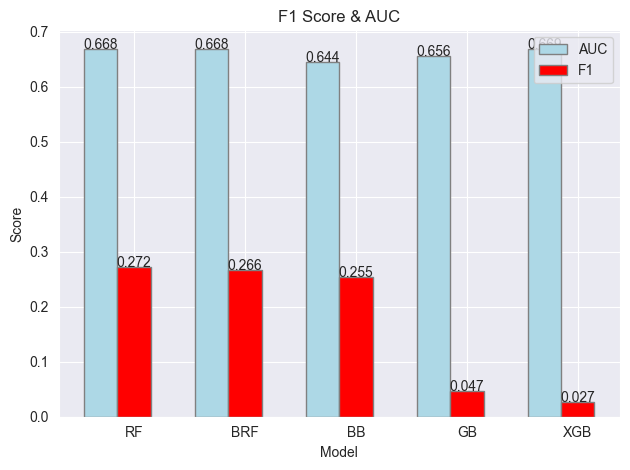

In [60]:
results = pd.DataFrame({
    'Model': ['RF','BRF','BB','GB','XGB'],
    'AUC': [auc(y_test, prediction_proba), auc(y_test, prediction_proba_brf), auc(y_test, prediction_proba_bb), auc(y_test, prediction_prob2), auc(y_test, predicted_prob_xgb)],
    'F1': [f1(y_test, prediction), f1(y_test, prediction_brf), f1(y_test, prediction_bb), f1(y_test, prediction2), f1(y_test, y_pred_xgb)]
})

barWidth = 0.3
r1 = range(len(results))
r2 = [x + barWidth for x in r1]

plt.bar(r1, results['AUC'], color='lightblue', width=barWidth, edgecolor='grey', label='AUC')

plt.bar(r2, results['F1'], color='red', width=barWidth, edgecolor='grey', label='F1')

for i in range(len(r1)):
    plt.text(r1[i], results['AUC'][i], round(results['AUC'][i], 3), ha='center')
    plt.text(r2[i], results['F1'][i], round(results['F1'][i], 3), ha='center')

plt.xticks([r + barWidth for r in range(len(results))], results['Model'])
plt.ylabel('Score')
plt.xlabel('Model')
plt.legend()
plt.title('F1 Score & AUC')
plt.tight_layout()

plt.show()


#### Model Exportation

In [64]:
joblib.dump(best_rf, '../models/best_rf.pkl')

['../models/best_rf.pkl']

## Ajouter SHAP ?